In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-analysis/Walmart.csv


In [2]:
# Read the data File
data = pd.read_csv('/kaggle/input/walmart-sales-analysis/Walmart.csv')
data.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [3]:
# lets check shape of the data
data.shape

(3203, 12)

## **Is there any missing value in the data**

In [4]:
# Lets check for missing value in the data
data.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

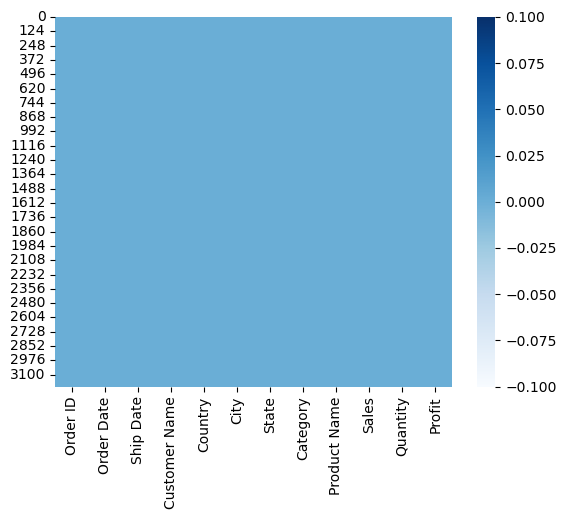

In [5]:
# view missing values by plot
sns.heatmap(data.isna(), cmap='Blues')
plt.show()

None of the values is missing in any column of the data

## **Is there Any Duplicate Value in Data**

In [6]:
# Lets check for duplicate values
data.duplicated().any()

False

So no duplicate values exists as well

In [7]:
# lets check for data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


We Need to change some of the data types of the columns

## **Data Preprocessing**

In [8]:
# change data types of the columns
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y')
data['Customer Name'] = data['Customer Name'].astype(str)
data['Country'] = data['Country'].astype(str)
data['City'] = data['City'].astype(str)
data['State'] = data['State'].astype(str)
data['Category'] = data['Category'].astype(str)
data['Product Name'] = data['Product Name'].astype(str)

In [9]:
# lets create two new columns one for order_year and Ship_Year
data['Order_year'] = data['Order Date'].dt.year
data['Ship_year'] = data['Ship Date'].dt.year
data.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,2013
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,2011


In [10]:
# we can also create months and day column
data['Order_month'] = data['Order Date'].dt.month_name()
data['Ship_month'] = data['Ship Date'].dt.month_name()
data['Order_day'] = data['Order Date'].dt.day
data['Ship_day'] = data['Ship Date'].dt.day
data.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,2013,June,June,13,17
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,2011,June,June,9,14


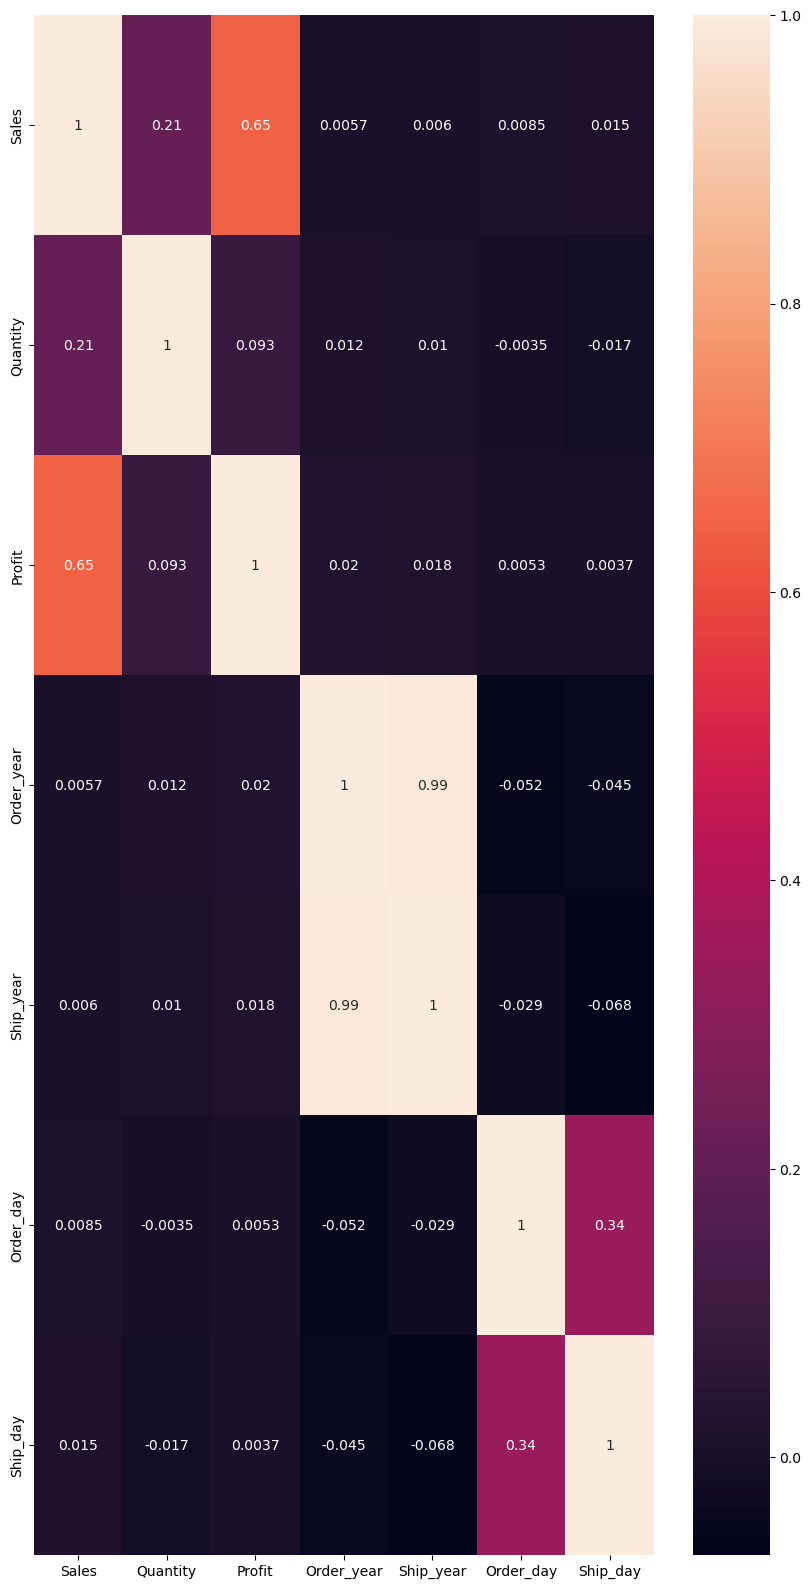

In [11]:
# Lets check for correlation between each column
plt.figure(figsize=(10,20))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

## **Which Year Had more Sales Overall?**

In [12]:
# more selling year
sale_year = data.groupby(['Order_year']).sum()['Sales'].reset_index() # assumin the amount was paid at the time of order
sale_year.sort_values(by='Order_year', ascending=False, inplace=True)
sale_year['Order_year'] = sale_year['Order_year'].astype(str)
sale_year.head()

,Order_year,Sales
3,2014,250632.53
2,2013,186976.09
1,2012,139966.24
0,2011,147883.07


In [13]:
sale_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 3 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_year  4 non-null      object 
 1   Sales       4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [14]:
# plot most selling Year
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=sale_year['Order_year'], y=sale_year['Sales'], text=sale_year['Sales'], textposition='inside')])
fig.update_layout(title='Sales on Each Year', xaxis_title='Year', yaxis_title='Sales')
fig.update_traces(marker_color='rgb(153, 51, 102)', marker_line_color='rgb(26, 0, 13)',
                  marker_line_width=1.5)
fig.show()

So, the most sale happend in 2014

## **Which Year had More Profit?**

In [15]:
# get the data
profit_year = data.groupby(['Order_year']).sum()['Profit'].reset_index()
profit_year.sort_values(by='Order_year', ascending=False, inplace=True)
profit_year['Order_year'] = profit_year['Order_year'].astype(str)
profit_year.head()

,Order_year,Profit
3,2014,43900.98
2,2013,23959.90
1,2012,20492.17
0,2011,20065.74


In [16]:
# plot most Profitable Year
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=profit_year['Order_year'], y=profit_year['Profit'], text=profit_year['Profit'], textposition='inside')])
fig.update_layout(title='Profit in Each Year', xaxis_title='Year', yaxis_title='Profit')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

So the Most Profitable Year is the 2014

## **Which USA State Had More Sales in Year 2014**

In [17]:
# filter the data for 2014
data_2014 = data[data['Order_year'] == 2014]
data_2014.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
28,US-2014-109484,2014-11-07,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,2014,2014,November,November,7,13
29,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,2014,2014,June,June,18,21


In [18]:
# get sates and sales data
data_sales_2014 = data_2014.groupby(['State']).sum()['Sales'].reset_index()
data_sales_2014.sort_values(by='Sales', ascending=False, inplace=True)
data_sales_2014.head()

,State,Sales
1,California,146729.09
9,Washington,65539.93
0,Arizona,11133.54
2,Colorado,10299.80
4,Montana,4229.28


In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=data_sales_2014['State'], values=data_sales_2014['Sales'], textinfo='label+percent',
                             insidetextorientation='radial',  hole=.3 )])
fig.update_layout(title='USA States Sales in 2014')
fig.show()

We can see that more sales happend in California

## **Which USA State Had more Profit in Year 2014**

In [20]:
# get the data
data_profit_2014 = data_2014.groupby(['State']).sum()['Profit'].reset_index()
data_profit_2014.sort_values(by='Profit', ascending=False, inplace=True)
data_profit_2014.head()

,State,Profit
1,California,29402.79
9,Washington,17256.86
4,Montana,1465.92
6,New Mexico,827.40
8,Utah,477.18


In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=data_profit_2014['State'], values=data_profit_2014['Profit'], textinfo='label+percent',
                             insidetextorientation='radial',  hole=.3 )])
fig.update_layout(title='USA States Profit in 2014')
fig.show()

Just Like Sales Most Profit was also in the california States in 2014

## **Which is most profitable city in Most Profitable State (California) in Most Profitable Year (2014)**

In [22]:
# filtering data for Year 2014 and State California
data_pr_state = data_2014[data_2014['State'] == 'California']
data_pr_state.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
29,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,2014,2014,June,June,18,21
45,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,2014,2014,September,September,19,24
46,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Envelopes,Convenience Packs of Business Envelopes,10.86,3.0,5.10,2014,2014,September,September,19,24
47,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Paper,Xerox 1911,143.70,3.0,68.98,2014,2014,September,September,19,24
66,CA-2014-108329,2014-12-10,2014-12-15,Laurel Elliston,United States,Whittier,California,Phones,Nortel Business Series Terminal T7208 Digital ...,444.77,4.0,44.48,2014,2014,December,December,10,15


In [23]:
# get the data for profitable city
pr_city = data_pr_state.groupby('City').sum()['Profit'].reset_index()
pr_city.sort_values(by='Profit', ascending=False, inplace=True)
pr_city.head()

,City,Profit
26,Los Angeles,10059.38
43,San Francisco,6631.44
40,Sacramento,1938.38
18,Inglewood,1026.72
3,Brentwood,985.39


In [24]:
# plot most Profitable City
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=pr_city['City'], y=pr_city['Profit'], text=pr_city['Profit'], textposition='inside')])
fig.update_layout(title='Profitable city in Most Profitable State (California) in Most Profitable Year (2014)', xaxis_title='City', yaxis_title='Profit')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

we can also get the top 5 profitable cities in California

In [25]:
# Top 5 profitable cities in california
pr_city_top5 = pr_city.head(5)

import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=pr_city_top5['City'], y=pr_city_top5['Profit'], text=pr_city_top5['Profit'], textposition='inside')])
fig.update_layout(title='Top 5 Profitable city in Most Profitable State (California) in Most Profitable Year (2014)', xaxis_title='City', yaxis_title='Profit')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

So the Most Profitable City in Most Profitable State (California) in most Profitable Year(2014) is Los Angeles

## **List Most Profitable Category in Most Profitable City (Los Angeles) in Most Profitable State (California) in Most Profitable Year (2014)**

In [26]:
# filter the data
pr_los_angeles = data_pr_state[data_pr_state['City'] == 'Los Angeles']
pr_los_angeles.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
126,CA-2014-110478,2014-03-05,2014-03-10,Sung Pak,United States,Los Angeles,California,Art,American Pencil,9.32,4.0,2.70,2014,2014,March,March,5,10
127,CA-2014-110478,2014-03-05,2014-03-10,Sung Pak,United States,Los Angeles,California,Envelopes,"White Envelopes, White Envelopes with Clear Po...",15.25,1.0,7.02,2014,2014,March,March,5,10
146,CA-2014-140963,2014-06-11,2014-06-14,Michelle Tran,United States,Los Angeles,California,Labels,Alphabetical Labels for Top Tab Filing,29.60,2.0,14.80,2014,2014,June,June,11,14
147,CA-2014-140963,2014-06-11,2014-06-14,Michelle Tran,United States,Los Angeles,California,Bookcases,O'Sullivan Living Dimensions 2-Shelf Bookcases,514.17,5.0,-30.25,2014,2014,June,June,11,14
148,CA-2014-140963,2014-06-11,2014-06-14,Michelle Tran,United States,Los Angeles,California,Phones,iHome FM Clock Radio with Lightning Dock,279.96,5.0,17.50,2014,2014,June,June,11,14


In [27]:
# getting the data for prfitable category
pr_categ = pr_los_angeles.groupby(['Category']).sum()['Profit'].reset_index()
pr_categ.sort_values(by='Profit', ascending=False, inplace=True)
pr_categ.head()

,Category,Profit
0,Accessories,2246.66
6,Copiers,2207.97
3,Binders,1892.53
12,Paper,925.50
14,Storage,862.57


In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=pr_categ['Category'], values=pr_categ['Profit'], textinfo='label+percent',
                             insidetextorientation='radial',  hole=.3 )])
fig.update_layout(title='Most Profitable Category in Los Angeles')
fig.show()

So the most profitable category in most profitable city (Los Angeles) in Most profitable State (California) in Most profitable Year (2014) is Accessories

## **List Most Profitable Product Name in most Profitable Category(Accessories) in Most Profitable City (Los Angeles) in Most Profitable State (California) in Most Profitable Year (2014)**

In [29]:
# filter the data to get most profitable catgory
pr_product = pr_los_angeles[pr_los_angeles['Category'] == 'Accessories']
pr_product.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
760,CA-2014-108574,2014-10-08,2014-10-12,Mike Gockenbach,United States,Los Angeles,California,Accessories,Logitech G19 Programmable Gaming Keyboard,1115.91,9.0,200.86,2014,2014,October,October,8,12
802,CA-2014-163902,2014-03-03,2014-03-09,Maribeth Yedwab,United States,Los Angeles,California,Accessories,Logitech G13 Programmable Gameboard with LCD D...,479.94,6.0,52.79,2014,2014,March,March,3,9
1495,CA-2014-138149,2014-06-30,2014-07-01,William Brown,United States,Los Angeles,California,Accessories,Enermax Briskie RF Wireless Keyboard and Mouse...,62.31,3.0,22.43,2014,2014,June,July,30,1
1607,CA-2014-159688,2014-05-08,2014-05-13,Adam Bellavance,United States,Los Angeles,California,Accessories,Logitech G600 MMO Gaming Mouse,79.99,1.0,28.80,2014,2014,May,May,8,13
1728,CA-2014-164707,2014-02-19,2014-02-22,Cynthia Voltz,United States,Los Angeles,California,Accessories,Memorex Micro Travel Drive 32 GB,109.53,3.0,47.10,2014,2014,February,February,19,22


In [30]:
# getting the data to get most profitable Product Name
pr_product_name = pr_product.groupby(['Product Name']).sum()['Profit'].reset_index()
pr_product_name.sort_values(by='Profit', ascending=False, inplace=True)
pr_product_name.head()

,Product Name,Profit
11,Logitech Z-906 Speaker sys - home theater - 5....,659.98
1,Imation Bio 2GB USB Flash Drive Imation Corp,440.76
10,Logitech P710e Mobile Speakerphone,244.62
6,Logitech G19 Programmable Gaming Keyboard,200.86
2,Kensington Expert Mouse Optical USB Trackball ...,142.49


In [31]:
# plot most Profitable Product Name
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=pr_product_name['Product Name'], y=pr_product_name['Profit'], text=pr_product_name['Profit'], textposition='inside')])
fig.update_layout(title='Profitable Product in most Profitable city (Los Angeles) in Most Profitable State (California) in Most Profitable Year (2014)', xaxis_title='City', yaxis_title='Profit')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

So the Most Profitable Product in Most Profitable Category (Accessories) in Most Profitable City (Los Angeles) in most profitable State (California) in Most Profitable year (2014) is 'Logitech\xa0Z-906 Speaker sys - home theater - 5.1-CH'

## **List the Top Customer Names Who generated more Profit by buying Most profitable Product (Logitech\xa0Z-906 Speaker sys - home theater - 5.1-CH) in most profitable Category (Accessories) in most Profitable City (Los Angeles) in Most Profutable State (California) in Most Profitable Year (2014)**

In [32]:
# filter the data to get Top 5 profitable customers
pr_cust = pr_product[pr_product['Product Name'] == 'Logitech\xa0Z-906 Speaker sys - home theater - 5.1-CH']
pr_cust.reset_index(drop=True, inplace=True)
pr_cust.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
0,US-2014-167318,2014-07-27,2014-08-02,George Zrebassa,United States,Los Angeles,California,Accessories,Logitech Z-906 Speaker sys - home theater - 5....,1649.95,5.0,659.98,2014,2014,July,August,27,2


In [33]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = pr_cust['Profit'][0],
    title = {"text": "George Zrebassa<br><span style='font-size:0.8em;color:gray'>"},
    number = {'prefix': "$"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

So the Person who Spent more in buying Most profitable Product (Logitech\xa0Z-906 Speaker sys - home theater - 5.1-CH) in most profitable Category (Accessories) in most Profitable City (Los Angeles) in Most Profutable State (California) in Most Profitable Year (2014) is 'George Zrebassa' by spending $660

## **List Most Profitable Month in the Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)**

In [34]:
pr_month = pr_los_angeles.groupby(['Order_month']).sum()['Profit'].reset_index()
pr_month.sort_values(by='Profit', ascending=False, inplace=True)
pr_month.head()


,Order_month,Profit
11,September,1953.49
2,December,1492.61
8,May,1308.79
5,July,1213.99
7,March,1138.68


In [35]:
# plot most profitable Month
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=pr_month['Order_month'], y=pr_month['Profit'], text=pr_month['Profit'], textposition='inside')])
fig.update_layout(title='Most Profitable Month in the Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)', xaxis_title='month', yaxis_title='Profit')
fig.update_traces(marker_color='rgb(153, 51, 102)', marker_line_color='rgb(26, 0, 13)',
                  marker_line_width=1.5)
fig.show()

## **List Sales on each day in the Most Profitable Month (September) Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)**

In [36]:
# filter the data for month as well
pr_los_angeles_month = pr_los_angeles[pr_los_angeles['Order_month'] == 'September']
pr_los_angeles_month.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Order_year,Ship_year,Order_month,Ship_month,Order_day,Ship_day
168,US-2014-129441,2014-09-08,2014-09-12,Jasper Cacioppo,United States,Los Angeles,California,Furnishings,Tenex Chairmats For Use With Carpeted Floors,47.94,3.0,2.40,2014,2014,September,September,8,12
461,CA-2014-103611,2014-09-13,2014-09-16,Jessica Myrick,United States,Los Angeles,California,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",8.36,2.0,3.01,2014,2014,September,September,13,16
567,CA-2014-128370,2014-09-11,2014-09-11,Frank Hawley,United States,Los Angeles,California,Chairs,DMI Arturo Collection Mission-style Design Woo...,362.35,3.0,27.18,2014,2014,September,September,11,11
568,CA-2014-128370,2014-09-11,2014-09-11,Frank Hawley,United States,Los Angeles,California,Binders,Avery Non-Stick Binders,7.18,2.0,2.25,2014,2014,September,September,11,11
787,CA-2014-102750,2014-09-05,2014-09-09,Greg Maxwell,United States,Los Angeles,California,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,1322.35,3.0,-99.18,2014,2014,September,September,5,9


In [37]:
sr_day = pr_los_angeles_month.groupby(['Order_day']).sum()['Sales'].reset_index()
# sr_day.sort_values(by='Sales', ascending=False, inplace=True)
sr_day['Order_day'] = sr_day['Order_day'].astype(str)
sr_day.head()

,Order_day,Sales
0,3,957.77
1,5,2088.06
2,8,67.70
3,10,557.83
4,11,369.53


In [38]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=sr_day['Order_day'], y=sr_day['Sales'], text=sr_day['Sales'], textposition='top center', mode='lines+markers+text', line = dict(color='firebrick')))
fig.update_layout(title='Sales on each day of the Most Profitable Month (September) Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)', xaxis_title='Days', yaxis_title='Sales')
fig.show()

So Most Selling happened on Day 16th of Most Profitable Month (September) Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)

## **List Profit on each day in the Most Profitable Month (September) Most Profitable in Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)**

In [39]:
#getting the data
pr_day = pr_los_angeles_month.groupby(['Order_day']).sum()['Profit'].reset_index()
pr_day.sort_values(by='Profit', ascending=False, inplace=True)
pr_day['Order_day'] = sr_day['Order_day'].astype(str)
pr_day.head()

,Order_day,Profit
7,16,895.62
11,25,252.38
0,3,194.02
10,24,180.27
1,5,120.96


In [40]:
# Plotting Profit on each day
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=pr_day['Order_day'], y=pr_day['Profit'], text=pr_day['Profit'], textposition='top center', mode='lines+markers+text', line = dict(color='green')))
fig.update_layout(title='Profit on each day of the Most Profitable Month (September) in the Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles)', xaxis_title='Days', yaxis_title='Sales')
fig.show()

So the most Profitable day was 16th of September in the Most Profitable Year (2014) in Most Profitable State (California) in Most Profitable City (Los Angeles) which is true as most sales happend on that day